In [82]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [83]:
dataset = load_dataset("mpg-ranch/light-stable-semantics", split='train')
first_obs = dataset[6]

print(f"Class token shape: {np.array(first_obs['cls_t0']).shape}") #cast to array
print(f"Patch token shape: {np.array(first_obs['patch_t0']).shape}") #cast to array

Class token shape: (1024,)
Patch token shape: (196, 1024)


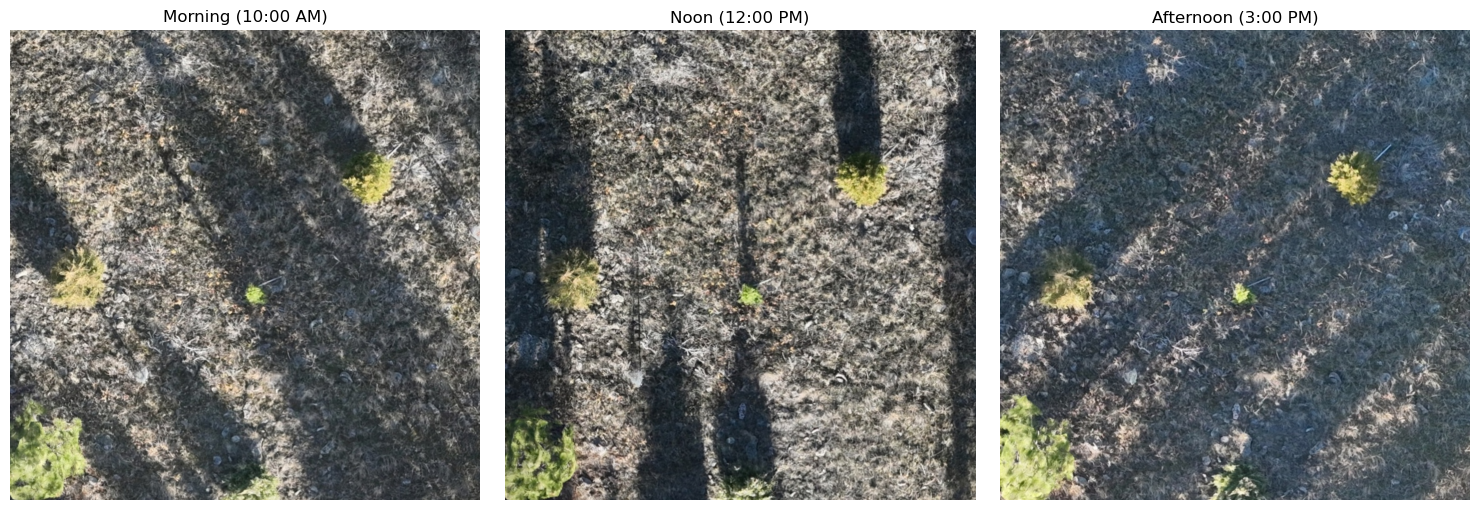

In [84]:
image_time_points = ['image_t0', 'image_t1', 'image_t2']
images = [first_obs[i] for i in image_time_points]
times = ['Morning (10:00 AM)', 'Noon (12:00 PM)', 'Afternoon (3:00 PM)']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (ax, image, time) in enumerate(zip(axes, images, times)):
    ax.imshow(image)
    ax.set_title(time, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

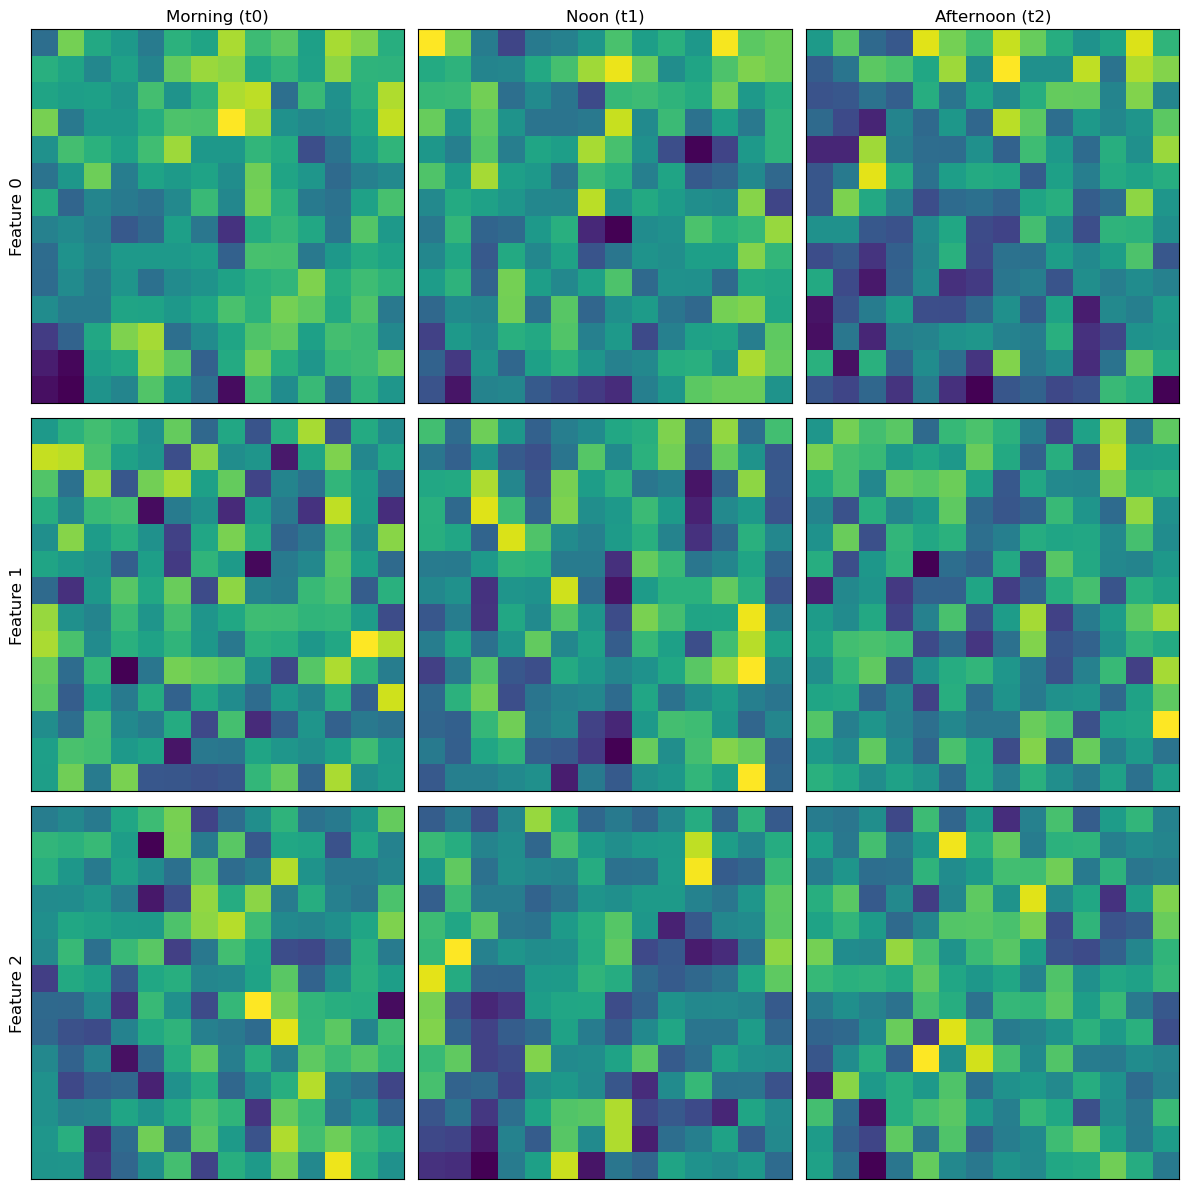

In [85]:
patch_t0 = np.array(first_obs['patch_t0']).reshape(14, 14, 1024, order='C')
patch_t1 = np.array(first_obs['patch_t1']).reshape(14, 14, 1024, order='C') 
patch_t2 = np.array(first_obs['patch_t2']).reshape(14, 14, 1024, order='C')

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

patches = [patch_t0, patch_t1, patch_t2]
times = ['Morning (t0)', 'Noon (t1)', 'Afternoon (t2)']

for feature_idx in range(3):  # First 3 features
    for time_idx, (patch, time_label) in enumerate(zip(patches, times)):
        ax = axes[feature_idx, time_idx]
        
        # Extract the feature map for this feature dimension
        feature_map = patch[:, :, feature_idx]
        
        # Display with viridis colormap
        im = ax.imshow(feature_map, cmap='viridis', aspect='equal')
        
        # Add labels
        if feature_idx == 0:
            ax.set_title(time_label, fontsize=12)
        if time_idx == 0:
            ax.set_ylabel(f'Feature {feature_idx}', fontsize=12)
        
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()

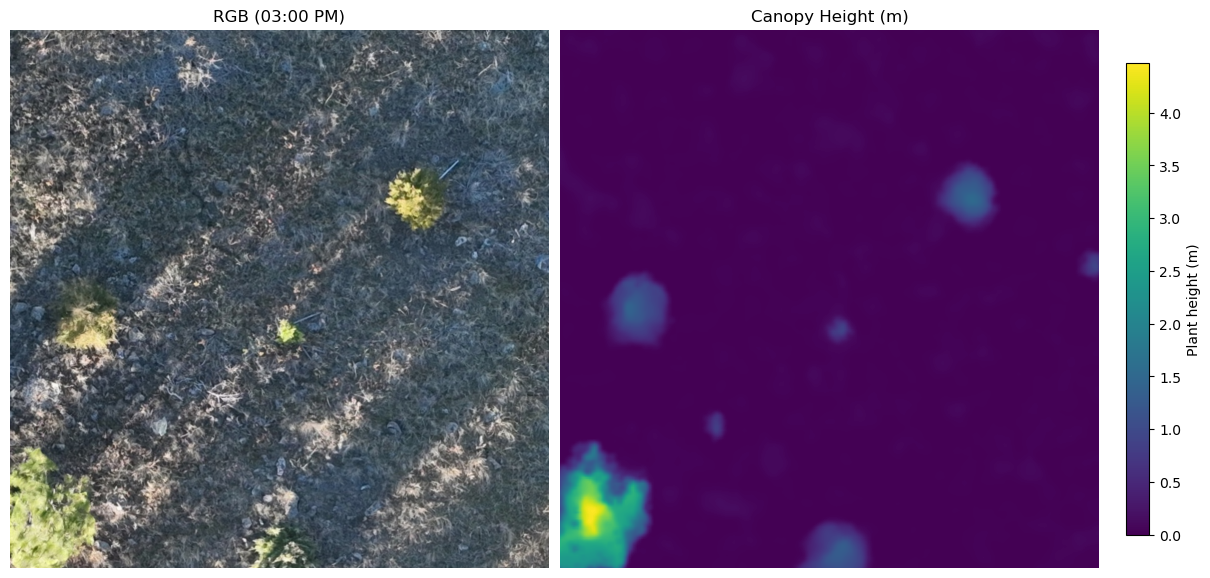

In [86]:
rgb_t1 = np.array(first_obs['image_t2'])
chm = np.array(first_obs['canopy_height'], dtype=np.float32) / 100

height, width = rgb_t1.shape[:2]
extent = [0, width, height, 0]

# Create figure with constrained layout to handle colorbar properly
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# RGB plot
axes[0].imshow(rgb_t1, extent=extent)
axes[0].set_title('RGB (03:00 PM)')
axes[0].set_aspect('equal')
axes[0].axis('off')

# CHM plot
cmap = plt.cm.viridis.copy()
cmap.set_bad('white', alpha=0.0)
im_chm = axes[1].imshow(chm, cmap=cmap, extent=extent, interpolation='nearest')
axes[1].set_title('Canopy Height (m)')
axes[1].set_aspect('equal')
axes[1].axis('off')

# Add colorbar without affecting subplot sizes
cbar = fig.colorbar(im_chm, ax=axes[1], shrink=0.8)
cbar.set_label('Plant height (m)')

plt.show()